## Importing Library


In [151]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [152]:
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

## Import DataSet

In [153]:
dataset = pd.read_csv("archive/Google_train_data.csv")

In [154]:
dataset.tail(5)

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [155]:
dataset.shape

(1258, 6)

## Data Preprocessing

In [156]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [158]:
dataset["Close"] = pd.to_numeric(dataset.Close, errors = "coerce")

In [159]:
dataset.info()
dataset.dropna(inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [160]:
x = dataset.iloc[:,4:5].values

## MinMax Scaling

In [161]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

In [162]:
x.shape

(1149, 1)

## Preparing Data

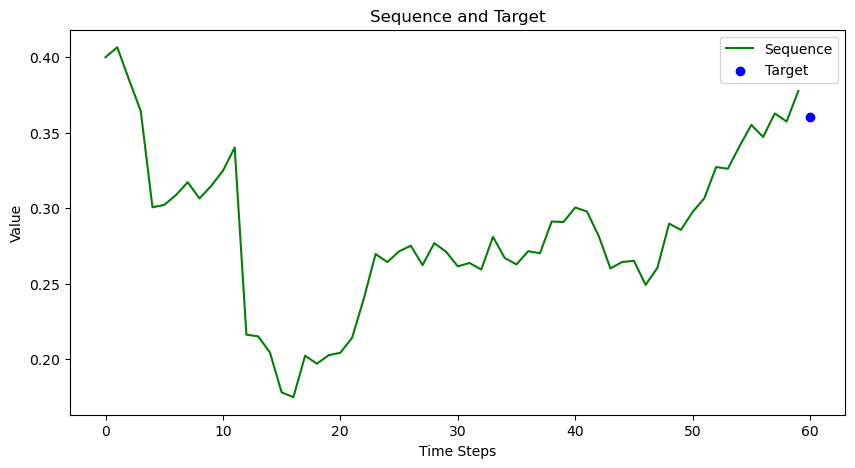

In [163]:
x_data = []
y_data = []

for i in range(60, 1149):
    x_data.append(x[i-60:i,0])
    y_data.append(x[i,0])

plt.figure(figsize=(10, 5))
plt.plot(range(len(x_data[0])), x_data[0], color = "green", label = "Sequence")
plt.scatter([len(x_data[0])], [y_data[0]], color='blue', label='Target')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Sequence and Target')
plt.legend()
plt.show()

In [164]:
x_data = np.array(x_data)
y_data = np.array(y_data)

## Adding Mini-Batch Size Axis

In [165]:
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1],1))

In [166]:
x_data.shape

(1089, 60, 1)

## Creating Model

In [167]:
model = Sequential()
model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_data.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 128, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation = "linear"))
model.add(Dropout(0.2))

model.compile(loss = "mean_squared_error", optimizer = "adam")


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [168]:
hist = model.fit(x_data, y_data, epochs = 20, batch_size = 32, verbose =2 )

Epoch 1/20
35/35 - 7s - 206ms/step - loss: 0.0988
Epoch 2/20
35/35 - 5s - 152ms/step - loss: 0.0631
Epoch 3/20
35/35 - 5s - 154ms/step - loss: 0.0640
Epoch 4/20
35/35 - 6s - 159ms/step - loss: 0.0592
Epoch 5/20
35/35 - 6s - 159ms/step - loss: 0.0566
Epoch 6/20
35/35 - 6s - 160ms/step - loss: 0.0574
Epoch 7/20
35/35 - 6s - 161ms/step - loss: 0.0569
Epoch 8/20
35/35 - 6s - 159ms/step - loss: 0.0533
Epoch 9/20
35/35 - 6s - 159ms/step - loss: 0.0616
Epoch 10/20
35/35 - 6s - 159ms/step - loss: 0.0588
Epoch 11/20
35/35 - 6s - 159ms/step - loss: 0.0622
Epoch 12/20
35/35 - 6s - 160ms/step - loss: 0.0590
Epoch 13/20
35/35 - 6s - 159ms/step - loss: 0.0619
Epoch 14/20
35/35 - 6s - 160ms/step - loss: 0.0548
Epoch 15/20
35/35 - 6s - 158ms/step - loss: 0.0594
Epoch 16/20
35/35 - 6s - 160ms/step - loss: 0.0511
Epoch 17/20
35/35 - 6s - 157ms/step - loss: 0.0614
Epoch 18/20
35/35 - 6s - 161ms/step - loss: 0.0578
Epoch 19/20
35/35 - 6s - 158ms/step - loss: 0.0579
Epoch 20/20
35/35 - 6s - 161ms/step - lo

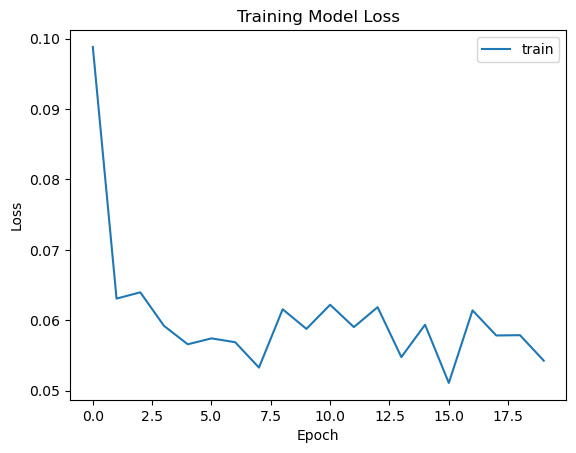

In [169]:
plt.plot(hist.history["loss"])
plt.title("Training Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train"], loc = "upper right")
plt.show()

## Testing Our Model

In [171]:
testdata = pd.read_csv("archive/Google_test_data.csv")
testdata["Close"] = pd.to_numeric(testdata.Close, errors = "coerce")
testdata.dropna(inplace = True)
testdata= testdata.iloc[:,4:5]
y_test = testdata.iloc[60:,0:].values

inputClosing = testdata.iloc[:,0:].values
inputClosingScaled = sc.transform(inputClosing)
inputClosing.shape

(252, 1)

In [174]:
X_test = []
timestep = 60
for i in range(timestep, len(testdata)):
    X_test.append(inputClosingScaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [175]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [176]:
predicted_price = sc.inverse_transform(y_pred)

In [177]:
predicted_price

array([[ 911.9077 ],
       [ 911.02203],
       [ 911.8355 ],
       [ 914.5555 ],
       [ 918.5296 ],
       [ 922.1903 ],
       [ 924.11646],
       [ 923.81665],
       [ 922.04065],
       [ 919.84644],
       [ 917.2186 ],
       [ 913.97424],
       [ 910.38086],
       [ 906.6576 ],
       [ 903.5508 ],
       [ 901.6705 ],
       [ 902.11206],
       [ 905.5256 ],
       [ 911.82227],
       [ 920.39655],
       [ 929.0111 ],
       [ 935.7732 ],
       [ 939.01544],
       [ 938.1533 ],
       [ 933.96136],
       [ 928.1409 ],
       [ 922.37067],
       [ 917.4099 ],
       [ 912.90704],
       [ 908.5889 ],
       [ 904.34973],
       [ 900.0373 ],
       [ 895.06213],
       [ 889.05194],
       [ 883.4572 ],
       [ 880.11743],
       [ 880.0188 ],
       [ 883.053  ],
       [ 888.5257 ],
       [ 894.78564],
       [ 901.28845],
       [ 907.90063],
       [ 914.6159 ],
       [ 921.2036 ],
       [ 927.1416 ],
       [ 931.6081 ],
       [ 933.7455 ],
       [ 933.

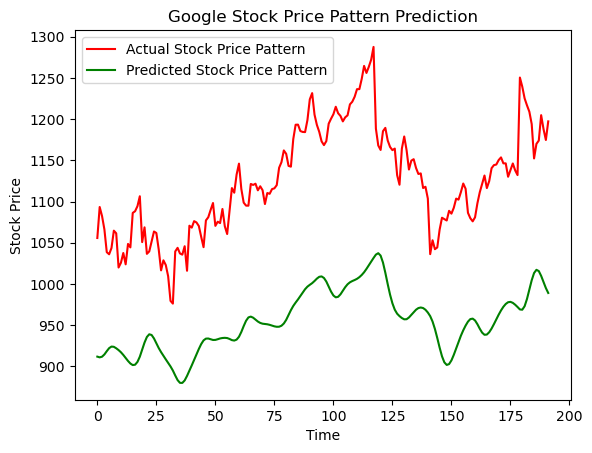

In [182]:
plt.plot(y_test, color = 'red',label = "Actual Stock Price Pattern")
plt.plot(predicted_price, color = 'green', label = "Predicted Stock Price Pattern")
plt.title("Google Stock Price Pattern Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

## Conclusion

#### In this project, we developed a machine learning model to predict Google stock prices based on historical data. After extensive data preprocessing, feature engineering, and model selection, our final model demonstrates a promising ability to capture patterns and trends in stock price movements.

#### Overall, the model serves as a solid foundation for predicting Google stock prices and offers valuable insights into market behavior.